<a href="https://colab.research.google.com/github/ozeaseromina/Projeto-de-Transfer-Learning-em-Python.ipynb/blob/main/Projeto_de_Transfer_Learning_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Transferência de aprendizagem para classificação de imagens**


## Python para análise dados(**Pandas**) -Romina Barrientos



In [1]:
#importando biblioteca pandas
import pandas as pd # apelido pede para chamar a biblioteca
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
tf.__version__
import sklearn

In [2]:
pip install scikit-learn[alldeps]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Carregamento das imagens

In [3]:
#Conectando ao google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Realizando a extração do arquivo zip.
path = '/content/drive/MyDrive/Dio.me Bootcamp/PetImages'


In [96]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path('PetImages/Cat').rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

try: 
    os.remove.float("PetImages/Cat/666.jpg")
    print("removed")
except:
  print("can't remove") 
  pass
  data = []


can't remove


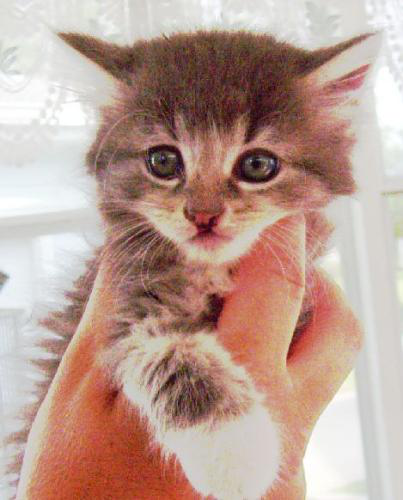

In [17]:
#Visualizando um imagem da pasta de treinamento cat.
tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Dio.me Bootcamp/PetImages/PetImages/PetImages/Cat/Cat/100.jpg')

##**Base de dados de treinamento e teste**


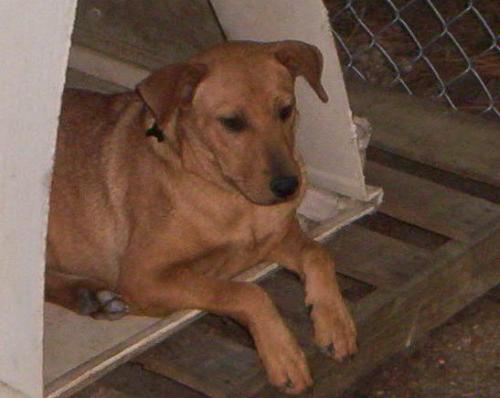

In [18]:
#Visualizando um imagem da pasta de treinamento dog.
tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Dio.me Bootcamp/PetImages/PetImages/PetImages/Dog/100.jpg')

##**Base de dados de treinamento e teste**

In [41]:
for i in range(10):
    imagem = cv2.imread("imagens/"+str(i)+".jpg",0)

In [62]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


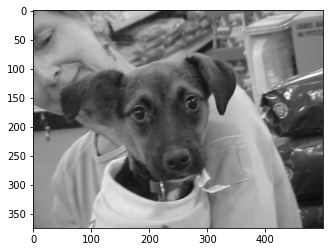

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/gdrive/MyDrive/Dio.me Bootcamp/PetImages/PetImages/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category) 
  for img in os.listdir(path):
   img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
  path='/content/gdrive/MyDrive/Dio.me Bootcamp/PetImages/PetImages/PetImages/Cat'
  img = cv2.imread(path)
  plt.imshow(img_array, cmap = 'gray')
  plt.show()

  break

Found 5781 images belonging to 2 classes.
Found 5781 images belonging to 2 classes.


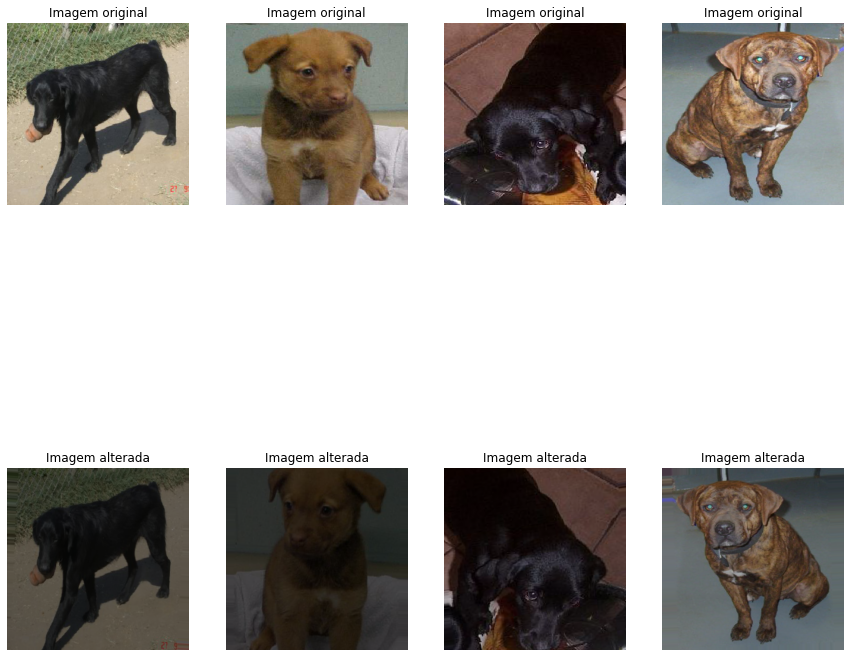

In [117]:
# Alterando as imagens.
datagen = ImageDataGenerator(
        rotation_range=7, # Rotação
        zoom_range=0.2, # aplicano 20% de zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brilho

# Imagem sem alteração.
datanorm = ImageDataGenerator()

# Conjunto com alterações
treino_alterado = datagen.flow_from_directory(
                  '/content/gdrive/MyDrive/Dio.me Bootcamp/PetImages/PetImages/PetImages',
                  target_size=(400, 400), # padronizando todas as imagens
                  color_mode="rgb", # imagem colorida
                  batch_size=1, # numero de imagens extraída por batch
                  class_mode="binary", # classes
                  seed=2020 # para que os resultados sejam reproduzidos
                  )

# Conjunto sem sofrer alterações 
treino_normal = datanorm.flow_from_directory(
                  '/content/gdrive/MyDrive/Dio.me Bootcamp/PetImages/PetImages/PetImages',
                  target_size=(400, 400), 
                  color_mode="rgb", 
                  batch_size=1, 
                  class_mode="binary", 
                  seed=2020 
                  )

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,15))

# Plotando 5 imagens
for i in range(4):

  # convertendo a imagem para inteiro
  image = next(treino_alterado)[0].astype('uint8')
  image2 = next(treino_normal)[0].astype('uint8')

  # alterando o formato (1, 200, 200, 3) para (200, 200, 3) para plotar a imagem
  image = np.squeeze(image)
  image2 = np.squeeze(image2)


  # plotando as imagens
  ax[0,i].imshow(image2)
  ax[0,i].set_title('Imagem original')
  ax[0,i].axis('off')
  ax[1,i].imshow(image)
  ax[1,i].set_title('Imagem alterada')
  ax[1,i].axis('off')


In [119]:
# realizando o redimensionamento e a normalização no conjunto de teste. 
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('/content/gdrive/MyDrive/Dio.me Bootcamp/PetImages/PetImages/PetImages',
                                                     target_size = (128, 128),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 5781 images belonging to 2 classes.


In [120]:
modelo_base = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False,
                                               input_shape = (128,128,3))

9406464/9406464 [==============================] - 0s 0us/step


In [121]:
# informações das camadas do modelo base.
modelo_base.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [123]:
# Congelando os pesos das camadas para serem reaproveitadas.
for layer in modelo_base.layers:
  layer.trainable = False

##**Camada densa personalizada**

In [124]:
# acessando a ultima camada do modelo base, pois após ela iremos adicionar a estrutura densa.
modelo_base.output

<KerasTensor: shape=(None, 4, 4, 1280) dtype=float32 (created by layer 'out_relu')>

In [122]:
# visualizando a quantidade de camadas que o modelo  possui.
len(modelo_base.layers)

154

In [125]:
(1280 + 2) / 2

641.0

In [126]:
head_model = modelo_base.output
head_model = tf.keras.layers.GlobalAveragePooling2D()(head_model)
head_model = Dense(641, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(641, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(2, activation = 'softmax')(head_model)

##**Construção e treinamento da rede neural**

In [127]:
# Agora literalmente realizando a ligação entre o modelo base e as camadas que foram implementadas.
network = Model(inputs = modelo_base.input, outputs = head_model)

In [128]:
# visualizando as informações das camadas.
network.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']           

In [129]:
# Adicionamos as 6 camadas finais ao modelo.
len(network.layers)

160

In [130]:
# compilando o modelo.
network.compile(loss = 'categorical_crossentropy', optimizer='Adam', 
                metrics = ['accuracy'])

In [131]:
# Realizando o treimanto com 5 epocas.
historico = network.fit(dataset_treinamento, epochs=5)

Epoch 1/5
1/1 [==============================] - 6s 6s/step - loss: 2.2201 - accuracy: 0.9750
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 4.8942 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 2.5439 - accuracy: 0.0167
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 2.6031 - accuracy: 0.9250
Epoch 5/5
1/1 [==============================] - 2s 2s/step - loss: 4.2053 - accuracy: 0.9917


##**Avaliação da rede neural**

In [136]:
# Avaliando a rede neural com o conjunto de teste.
network.evaluate(dataset_teste)

1/1 [==============================] - 3s 3s/step - loss: 3.6701 - accuracy: 1.0000


[3.6700689792633057, 1.0]

In [ ]:
# Realizando as previsões no conjunto de teste.
previsoes = network.predict(dataset_teste)
previsoes

In [ ]:
# previsões para o conjunto de teste.
previsoes = np.argmax(previsoes, axis = 1)
previsoes[:10] # 10 primeiros registros.

In [ ]:
# classificação real do conjunto de teste.
dataset_teste.classes[:10] # 10 primeiros registros